# Codigo del tp Realizado con Python

Creamos una clase instancia para poder guardar todo lo relativo con cada una de las instancias (archivos) de entrada, esta genera la matriz CMM , el vector b para la ecuacion Cb=r, para resolver esto es necesario crear una instancia de la clase usar
`ins = Instancia(PATH_ARCHIVO,BOOL)` 
donde el primer parametro del contructor es el path del archivo y el segundo un bool que si es true le presta atencion a los empates, si no los ignora(el default es false y no hace falta enviarlo.
por ej:
`ins = Instancia("tests/tests_nuestros/testEmpate.in",True)` o `ins = Instancia("tests/test1.in")` . 


In [10]:
from base import Instancia, gauss

# Contemos Empates

##### Veamos en esta seccion que pasa si contamos empate sumandole como una victoria a cada uno

In [11]:
ins = Instancia("tests/tests_nuestros/testEmpate.in",True)

FileNotFoundError: [Errno 2] No such file or directory: 'tests/tests_nuestros/testEmpate.in'

### veamos nuestra matriz CMM

In [266]:
ins._cmm

array([[ 6., -0., -2., -2., -0., -0.],
       [-0.,  6., -1., -0., -1., -2.],
       [-2., -1.,  6., -1., -0., -0.],
       [-2., -0., -1.,  7., -1., -1.],
       [-0., -1., -0., -1.,  6., -2.],
       [-0., -2., -0., -1., -2.,  7.]])

### veamos el total de enfrentamientos y partidos ganados entre equipos

In [267]:
ins.enfrentamientos

array([[0., 0., 2., 2., 0., 0.],
       [0., 0., 1., 0., 1., 2.],
       [2., 1., 0., 1., 0., 0.],
       [2., 0., 1., 0., 1., 1.],
       [0., 1., 0., 1., 0., 2.],
       [0., 2., 0., 1., 2., 0.]])

In [268]:
ins.ganados

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [2., 1., 0., 1., 0., 0.],
       [2., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 2., 0., 0., 2., 0.]])

In [269]:
ins.b

array([0. , 0. , 3. , 1.5, 0. , 2.5])

In [270]:
# Resuelvo la ecuacion Cb=r para obtener raitings
res = gauss(ins._cmm,ins.b)

In [271]:
res

array([[0.4912234 ],
       [0.43803191],
       [0.84202128],
       [0.63164894],
       [0.40797872],
       [0.68909574]])

## Misma instancia ignorando empates

In [272]:
ins2 = Instancia("tests/tests_nuestros/testEmpate.in")

['1', '1', '1', '4', '1']
['1', '2', '38', '5', '17']
gana 2
['1', '2', '0', '6', '1']
gana 6
['1', '3', '34', '1', '21']
gana 3
['1', '3', '23', '4', '10']
gana 3
['1', '4', '31', '1', '6']
gana 4
['1', '5', '0', '6', '1']
gana 6
['1', '5', '38', '4', '23']
gana 5
['1', '6', '1', '2', '0']
gana 6
['1', '6', '1', '5', '0']
gana 6
['1', '4', '1', '6', '0']
gana 4
['1', '3', '1', '1', '0']
gana 3
['1', '3', '1', '2', '0']
gana 3


In [273]:
ins2.enfrentamientos

array([[0., 0., 2., 1., 0., 0.],
       [0., 0., 1., 0., 1., 2.],
       [2., 1., 0., 1., 0., 0.],
       [1., 0., 1., 0., 1., 1.],
       [0., 1., 0., 1., 0., 2.],
       [0., 2., 0., 1., 2., 0.]])

In [282]:
ins2.ganados

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [2., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 2., 0., 0., 2., 0.]])

In [274]:
res2=gauss(ins2._cmm,ins2.b)

In [275]:
res2

array([[0.30455508],
       [0.40483757],
       [0.7545904 ],
       [0.51359463],
       [0.3704096 ],
       [0.65201271]])

## Veamos que pasa si el empate resta

In [276]:
ins3 = Instancia("tests/tests_nuestros/testEmpate.in",True,False)

['1', '1', '1', '4', '1']
empate1-4
['1', '2', '38', '5', '17']
gana 2
['1', '2', '0', '6', '1']
gana 6
['1', '3', '34', '1', '21']
gana 3
['1', '3', '23', '4', '10']
gana 3
['1', '4', '31', '1', '6']
gana 4
['1', '5', '0', '6', '1']
gana 6
['1', '5', '38', '4', '23']
gana 5
['1', '6', '1', '2', '0']
gana 6
['1', '6', '1', '5', '0']
gana 6
['1', '4', '1', '6', '0']
gana 4
['1', '3', '1', '1', '0']
gana 3
['1', '3', '1', '2', '0']
gana 3


In [277]:
res3=gauss(ins3._cmm,ins3.b)

In [278]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [279]:
resf=flatten(res)
res2f=flatten(res2)
res3f=flatten(res3)
equipos=[1,2,3,4,5,6]
fig = go.Figure(data=[
    go.Bar(name='Sin contar empates', x=equipos, y=res2f),
    go.Bar(name='Contando Empates que suman', x=equipos, y=resf),
    go.Bar(name='Contando Empates que restan', x=equipos, y=res3f)
])
fig.layout.update(barmode='group')

Layout({
    'barmode': 'group'
})

In [280]:
init_notebook_mode(connected=True)

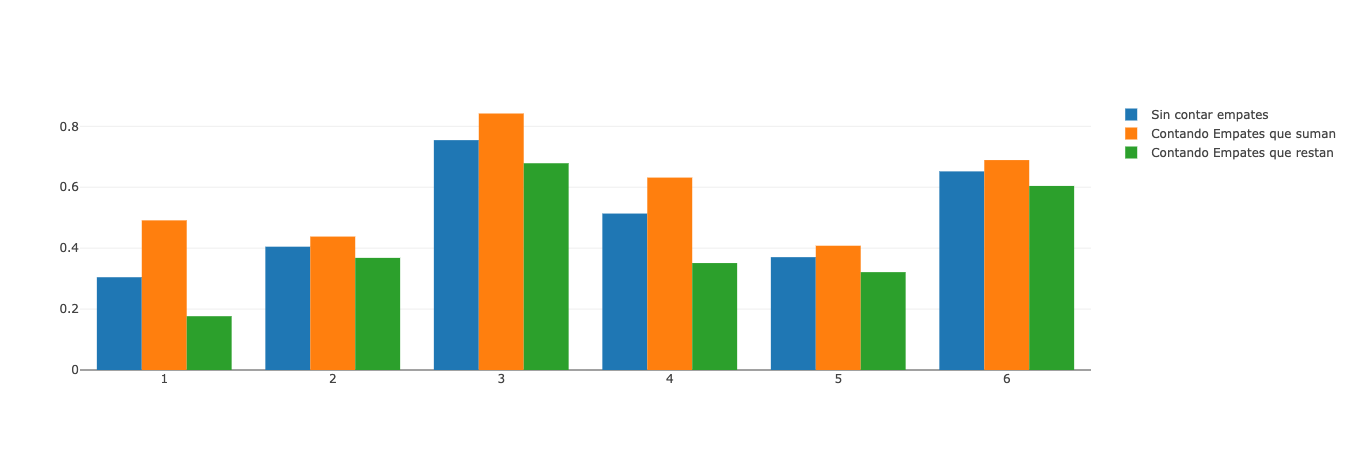

In [281]:
iplot(fig)

#